Importing libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

importing dataset

In [108]:
dataset = pd.read_csv("wine_data.csv")

Dividing the dataset(feature and target variable)

In [109]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Splitting into training and testing set

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

NO NEED TO DO FEATURE SCALING IN DECISION TREE AND RANDOM FOREST

DECISION TREE MODEL

In [111]:
dt_model = DecisionTreeClassifier(max_depth=6,criterion ='entropy', min_samples_leaf=5 ,random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.5975

Decision Tree Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.64      0.83      0.72       164
           6       0.61      0.51      0.55       169
           7       0.39      0.35      0.37        48
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.27      0.28      0.27       400
weighted avg       0.57      0.60      0.58       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


confusion matrix

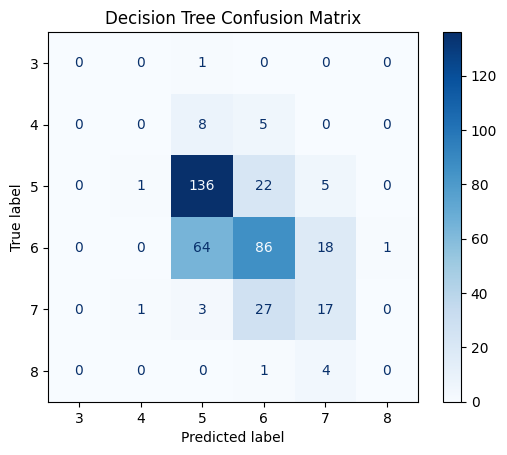

In [112]:
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

RANDOM FOREST MODEL

In [113]:
rf_model = RandomForestClassifier(n_estimators=200,criterion = 'entropy', max_depth=10,random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.6675

Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.72      0.77      0.75       164
           6       0.64      0.70      0.67       169
           7       0.58      0.46      0.51        48
           8       0.00      0.00      0.00         5

    accuracy                           0.67       400
   macro avg       0.32      0.32      0.32       400
weighted avg       0.63      0.67      0.65       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


confusion matrix

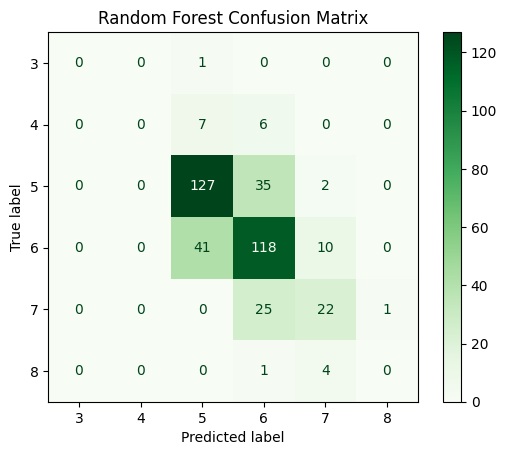

In [114]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

most frequently occurring wine quality and   the highest number in and the lowest number in the quality column

In [115]:
most_freq_quality = dataset['quality'].value_counts().idxmax()
most_freq_count = dataset['quality'].value_counts().max()

print(f"Most Frequent Wine Quality: {most_freq_quality} (Count: {most_freq_count})")

max_quality = dataset['quality'].max()
min_quality = dataset['quality'].min()

print(f"Highest wine quality in dataset: {max_quality}")
print(f"Lowest wine quality in dataset: {min_quality}")


Most Frequent Wine Quality: 5 (Count: 681)
Highest wine quality in dataset: 8
Lowest wine quality in dataset: 3


fixed acidity , alcohol content , free sulpher dioxide  correlation with wine quality

Fixed Acidity vs Quality: 0.12405164911322257
Alcohol vs Quality: 0.4761663239995377
Free Sulfur Dioxide vs Quality: -0.05065605724427594


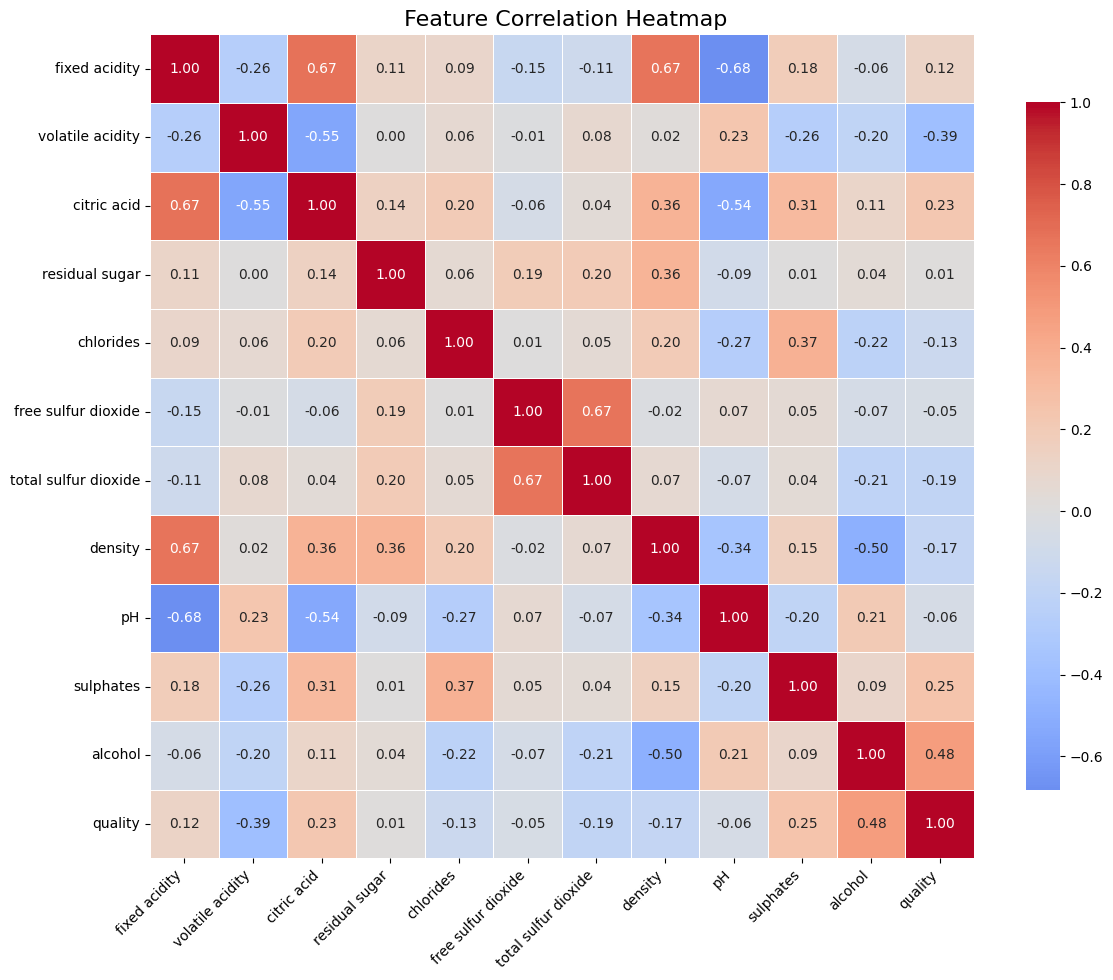

In [116]:
# Compute correlation of all features with 'quality'
correlations = dataset.corr(numeric_only=True)['quality'].sort_values(ascending=False)

# Extract specific correlations
corr_fixed_acidity = correlations['fixed acidity']
corr_alcohol = correlations['alcohol']
corr_free_sulfur = correlations['free sulfur dioxide']

print("Fixed Acidity vs Quality:", corr_fixed_acidity)
print("Alcohol vs Quality:", corr_alcohol)
print("Free Sulfur Dioxide vs Quality:", corr_free_sulfur)


#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
corr = dataset.corr(numeric_only=True)

# Set the plot size
plt.figure(figsize=(12, 10))

# Create a heatmap with better formatting
sns.heatmap(
    corr,
    annot=True,               # Show correlation values
    fmt=".2f",                # Format to 2 decimal places
    cmap='coolwarm',          # Color gradient (blue to red)
    center=0,                 # Center the color bar at 0
    square=True,              # Make cells square
    linewidths=0.5,           # Add cell borders
    cbar_kws={"shrink": 0.8}, # Shrink the color bar
    annot_kws={"size": 10}    # Annotation font size
)

# Set the title and style
plt.title(" Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()




 Residual Sugar in Best & Worst Quality Wines

In [117]:
best_quality = dataset['quality'].max()
worst_quality = dataset['quality'].min()

avg_sugar_best = dataset[dataset['quality'] == best_quality]['residual sugar'].mean()
avg_sugar_worst = dataset[dataset['quality'] == worst_quality]['residual sugar'].mean()

print(f"\nAverage Residual Sugar for Best Quality ({best_quality}): {avg_sugar_best:.2f}")
print(f"Average Residual Sugar for Worst Quality ({worst_quality}): {avg_sugar_worst:.2f}")


Average Residual Sugar for Best Quality (8): 2.58
Average Residual Sugar for Worst Quality (3): 2.64


Effect of Volatile Acidity on Quality


Volatile Acidity vs Quality Correlation: -0.391


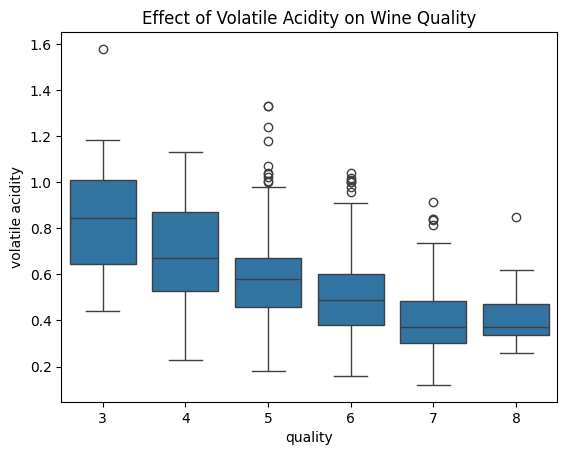

In [118]:

vol_corr = dataset['volatile acidity'].corr(dataset['quality'])
print(f"\nVolatile Acidity vs Quality Correlation: {vol_corr:.3f}")

# Visualization
sns.boxplot(x='quality', y='volatile acidity', data=dataset)
plt.title("Effect of Volatile Acidity on Wine Quality")
plt.show()
